In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [17]:
#g,h must be positive
#r,s change steepness
#x0,y0 change center

def model(y_in,t, params):
    if params is None:
        s=1
        r=1
        g=2
        h=3
        y0=-1
        x0=2
    else:
        s = params['s']
        r = params['r']
        g = params['g']
        h = params['h']
        y0 = params['y0']
        x0 = params['x0']
        
    x = y_in[0]
    y = y_in[1]
    
    E = 1/(1 + np.exp(-s * (y-y0)))
    #E = np.cos(s * (y-y0))
    F = 1/(1 + np.exp(-r * (x-x0)))
    
    dxdt = g * (E-x)
    dydt = h * (F-y)
    
    return [dxdt, dydt]

def phase_plane(model, start = [1,2], t = np.linspace(0, 5, 100), s=1, r=1, g=2, h=3, y0=-1, x0=2):
    fig0, ax0 = plt.subplots(1,1,figsize=(8,8))
    
    x = np.linspace(-5,5,100)
    y = np.linspace(-5,5,100)
    
    E = 1/(1 + np.exp(-s * (y-y0)))
    #E = np.cos(s * (y-y0))
    F = 1/(1 + np.exp(-r * (x-x0)))
    
    plt.plot(x,F,'k',linewidth = 2)
    plt.plot(E,y, 'k', linewidth = 2)
    
    for x in range(-5,6):
        for y in range(-5,6):
            y_out = odeint(model, [x,y], t, args = ({'s':s, 'r':r, 'g':g, 'h':h, 'y0':y0, 'x0':x0},))
            plt.plot(y_out[:,0],y_out[:,1])
   
    plt.axis([-5,5,-5,5])
    plt.xlabel('x', fontsize =18)
    plt.ylabel('y', fontsize = 18)
    plt.grid()
    

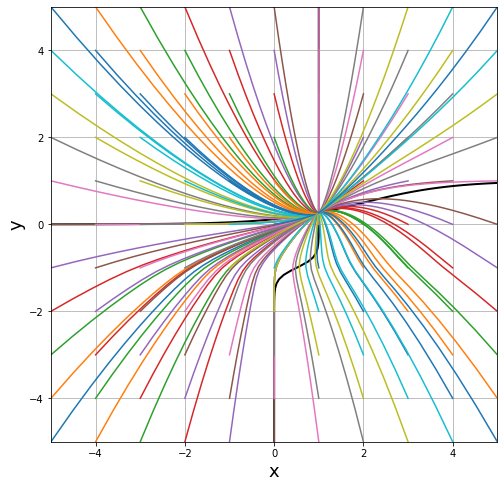

In [18]:
phase_plane(model, s=8)
